 Monthly Sales Growth vs Discount Rate Scenario: The Sales Team wants to track the relationship between monthly sales growth and the discount rate applied. Requirements: • Create a combo chart showing monthly sales growth ((current_month_sales - previous_month_sales) / previous_month_sales) on the primary axis. • Create a secondary axis showing the average discount rate per month (SUM(discount_amount) / SUM(before_discount)). • Add a line for discount rate and bars for sales growth. Key Features to Use: • order_date • before_discount • discount_amount

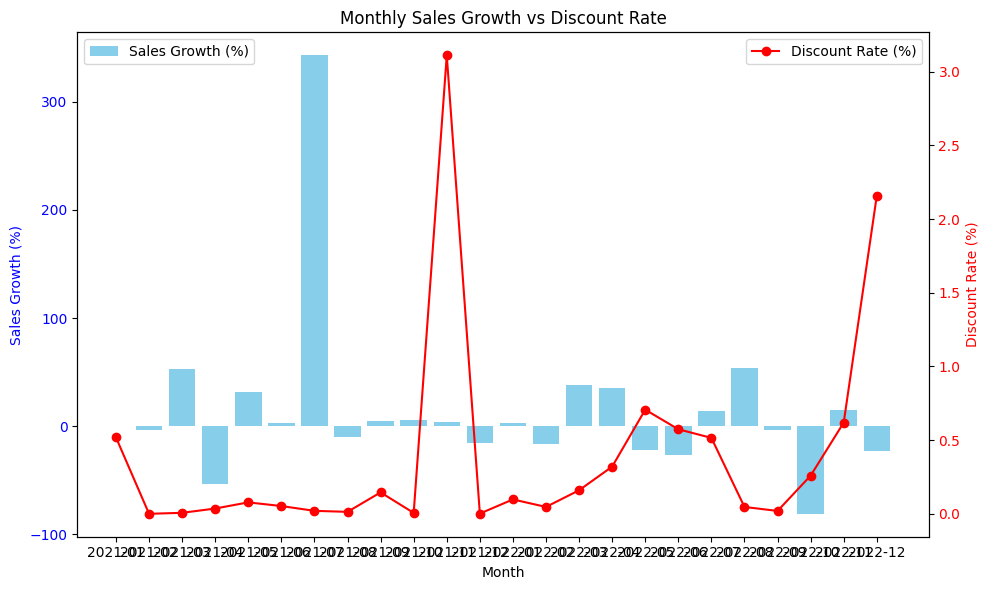

📊 Monthly Sales Growth vs Discount Rate:
   year_month  total_sales  sales_growth  discount_rate
0     2021-01  118470360.5           NaN       0.518217
1     2021-02  114136205.0     -3.658430       0.000000
2     2021-03  174921428.0     53.256741       0.006632
3     2021-04   81041699.0    -53.669656       0.035784
4     2021-05  106922824.0     31.935566       0.077554
5     2021-06  110392498.0      3.245027       0.052540
6     2021-07  489177247.4    343.125444       0.020047
7     2021-08  438023682.0    -10.457061       0.013241
8     2021-09  457668210.0      4.484810       0.145256
9     2021-10  481800240.5      5.272822       0.006019
10    2021-11  501195955.0      4.025676       3.111680
11    2021-12  423289615.0    -15.544088       0.001370
12    2022-01  435449384.7      2.872683       0.097518
13    2022-02  363371180.0    -16.552602       0.046540
14    2022-03  502142414.0     38.189940       0.159749
15    2022-04  681096540.0     35.638122       0.320084
16    2

In [1]:
# 📌 Task: Monthly Sales Growth vs Discount Rate

import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load dataset
file_path = r"C:\Users\bhave\OneDrive\Desktop\dashboard\dataset2\finaldataset.csv"
df = pd.read_csv(file_path)

# Step 2: Convert order_date to datetime
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# Step 3: Extract year-month
df['year_month'] = df['order_date'].dt.to_period("M").astype(str)

# Step 4: Aggregate monthly sales & discounts
monthly_data = df.groupby('year_month').agg(
    total_sales=('before_discount', 'sum'),
    total_discount=('discount_amount', 'sum')
).reset_index()

# Step 5: Calculate sales growth % vs previous month
monthly_data['sales_growth'] = monthly_data['total_sales'].pct_change() * 100

# Step 6: Calculate discount rate = total_discount / total_sales
monthly_data['discount_rate'] = (monthly_data['total_discount'] / monthly_data['total_sales']) * 100

# Step 7: Plot combo chart
fig, ax1 = plt.subplots(figsize=(10,6))

# Bar chart for sales growth
ax1.bar(monthly_data['year_month'], monthly_data['sales_growth'], color='skyblue', label='Sales Growth (%)')
ax1.set_ylabel("Sales Growth (%)", color='blue')
ax1.set_xlabel("Month")
ax1.tick_params(axis='y', labelcolor='blue')

# Secondary axis for discount rate
ax2 = ax1.twinx()
ax2.plot(monthly_data['year_month'], monthly_data['discount_rate'], color='red', marker='o', label='Discount Rate (%)')
ax2.set_ylabel("Discount Rate (%)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Titles & Legends
plt.title("Monthly Sales Growth vs Discount Rate")
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.xticks(rotation=45)
plt.show()

# Step 8: Display final data
print("📊 Monthly Sales Growth vs Discount Rate:")
print(monthly_data[['year_month', 'total_sales', 'sales_growth', 'discount_rate']])
